### Day Objectives
- Split dataset for training and testing
- Regularization models

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

C:\Users\Mouni\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Mouni\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df['Target'] = boston.target

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
df.shape

(506, 14)

In [6]:
X = df.drop(['Target'], axis = 1)
Y = df['Target']

In [7]:
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [8]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

C:\Users\Mouni\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, 
                                                    random_state = 54)

In [13]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27
466,3.77498,0.0,18.10,0.0,0.655,5.952,84.7,2.8715,24.0,666.0,20.2,22.01,17.15
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27
261,0.53412,20.0,3.97,0.0,0.647,7.520,89.4,2.1398,5.0,264.0,13.0,388.37,7.26
43,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44


In [15]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
316,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33


In [16]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
Y_predict = lr.predict(X_test)
Y_predict

array([17.62114556, 20.94917883, 17.69978872, 26.33709074,  8.09067211,
       16.9259538 , 19.36450487, 23.21412177, 17.06541721, 31.68426216,
       11.68115491, 16.87626224,  5.50838669, 13.72553182, 23.66064785,
       20.7714077 , 23.11468769,  5.78081801, 23.98148809, 24.49964805,
       34.608736  ,  8.95839877, -5.67571872, 18.91542981, 29.07900259,
       28.52273772, -0.61301197, 19.8019764 , 25.2536986 , 16.89528662,
       28.72935305, 26.38624572, 20.45771564, 31.04097579, 14.15183543,
       15.03315375, 34.80148105, 23.71694695, 16.72627795, 36.16376182,
       10.91489755,  4.2331123 ,  8.34201002, 16.98506259,  6.99891306,
       35.6254649 , 18.67039586, 27.94785515, 11.00435156, 33.92398473,
       19.99780502, 23.84848843, 15.66839132, 33.45269615, 13.91984905,
       16.9880399 , 29.25332274, 20.89293307, 19.34103587, 21.60570518,
       21.80704297, 22.8340731 , 19.77984837, 33.05596116, 25.19641788,
       39.25976855, 17.20539845, 37.44378216, 13.49943781, 14.21

In [21]:
Y_test

316    17.8
59     19.6
135    18.1
504    22.0
367    23.1
345    17.5
128    18.0
309    20.3
465    19.9
55     35.4
400     5.6
467    19.1
418     8.8
34     13.5
501    22.4
483    21.8
44     21.2
417    10.4
171    19.1
164    22.7
291    37.3
32     13.2
414     7.0
356    17.8
93     25.0
238    23.7
374    13.8
336    19.5
251    24.8
209    20.0
       ... 
293    23.9
179    37.2
377    13.3
103    19.3
1      21.6
115    18.3
153    19.4
193    31.1
365    27.5
369    50.0
126    15.7
387     7.4
357    21.7
240    22.0
289    24.8
124    18.8
18     20.2
379    10.2
431    14.1
134    15.6
335    21.1
473    29.8
0      24.0
321    23.1
288    22.3
269    20.7
359    22.6
185    29.6
495    23.1
330    19.8
Name: Target, Length: 102, dtype: float64

In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(Y_test, Y_predict)

0.6464256369442031

In [24]:
print('Training Performance',lr.score(X_train, Y_train))
print('Testing Performance',lr.score(X_test, Y_test))

Training Performance 0.7526790426373962
Testing Performance 0.6464256369442031


### Regularization Models
- Regularization is one pf the regression models
- Used to solve underfitting and Overfitting problems
- Types Regularization model
    1. Redge Regresion or L2-Regularization
        - To overcome overfitting problems
    2. Lasso Regression or L1-Regularization
        - To overcome underfitting problems

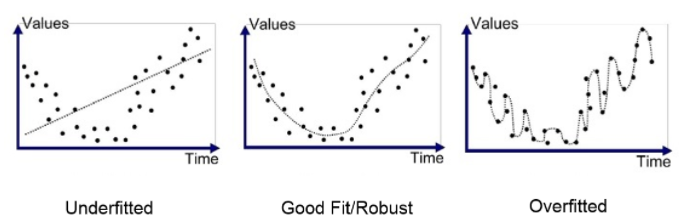

- **Overfit**: Model perfomed good while training, but performed worst while testing
- **Underfit**: Model performed worst in both training and testing

In [25]:
lr.coef_

array([-1.02939336e-01,  3.85225804e-02,  6.93225135e-02,  2.63056577e+00,
       -2.13842605e+01,  4.67722272e+00,  2.44081100e-03, -1.34442443e+00,
        2.90658499e-01, -1.23552220e-02, -9.38630433e-01,  1.06513700e-02,
       -4.87681787e-01])

In [26]:
import matplotlib.pyplot as plt

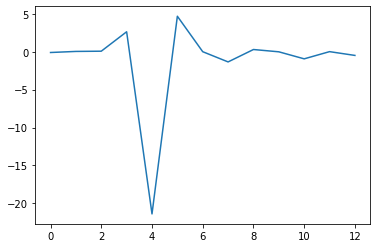

In [27]:
plt.plot(lr.coef_)

In [28]:
from sklearn.linear_model import Ridge

In [29]:
r1 = Ridge()
r1

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
r2 = Ridge(alpha = 100)
r2

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
r2.fit(X_train, Y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
Y_predict2 = r2.predict(X_test)
Y_predict2

array([17.64415625, 22.70428786, 16.69495877, 26.89573671, 13.12426501,
       17.722421  , 18.35622916, 24.44594143, 18.72961221, 31.9092683 ,
       10.48134302, 14.86854158,  5.3826705 , 13.23813459, 24.11530658,
       20.82175029, 23.57350244,  6.09126845, 24.46095585, 25.08941789,
       33.91387791,  7.4904581 , -5.42602515, 18.81052076, 28.97069797,
       28.60901832, -0.52187293, 22.34364035, 26.37313059, 13.99925751,
       28.35204656, 27.95233782, 19.88817838, 30.34386685, 19.81408819,
       12.62564607, 32.90471696, 22.01613447, 15.70081514, 37.06167069,
       10.17102502,  3.20792715, 12.57955744, 17.50252006, 11.52012811,
       33.15295057, 21.57778753, 28.63324739, 14.89152633, 32.57843403,
       21.12234628, 23.57022219, 16.41086483, 29.96251404, 14.14910901,
       14.90560396, 28.21760851, 21.18617931, 20.7864762 , 21.03617123,
       25.42783128, 22.51901403, 20.92970095, 30.59382522, 26.1136527 ,
       39.60511302, 20.04359385, 36.22314207, 13.4235583 , 11.61

In [33]:
print('Training Performance',r2.score(X_train, Y_train))
print('Testing Performance', r2.score(X_test, Y_test))

Training Performance 0.7195406617664778
Testing Performance 0.6998413948377683


In [34]:
r2.coef_

array([-1.08890500e-01,  4.79248535e-02, -2.61681528e-02,  5.48510217e-01,
       -2.34137600e-01,  2.47511558e+00,  6.10127807e-04, -1.03616068e+00,
        3.12041616e-01, -1.64043368e-02, -8.52214566e-01,  9.74380999e-03,
       -6.79796624e-01])

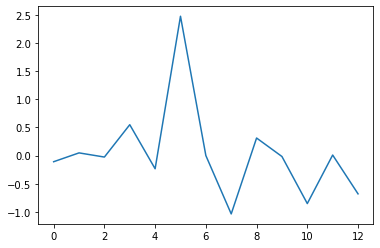

In [35]:
plt.plot(r2.coef_)

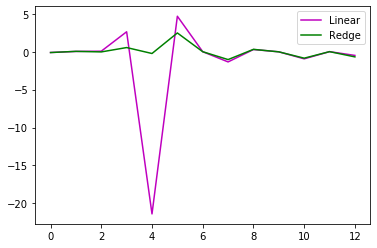

In [38]:
plt.plot(lr.coef_, color = 'm', label = 'Linear')
plt.plot(r2.coef_, color = 'g', label = 'Redge')
plt.legend()
plt.show()

#### Task
- Try Lasso Regression by yourself(alpha = default)
- plot linear regression, ridge, lasso slope coeficients